<a href="https://colab.research.google.com/github/klydem11/AI_CW/blob/master/sorting_characters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 140kB/s 
ERROR: umap-learn 0.4.4 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [0]:
import time
import requests
import zipfile
import io
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from skimage.feature import hog

In [0]:
r = requests.get('https://github.com/klydem11/AI_CW/raw/master/WritingRecognitionUpdate.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [0]:
class Extract_Letters:
    def extractFile(self, filename):
        image = imread(filename, 1)
        #image = imread('./WritingRecognition/page.png',1)

        # apply threshold in order to make the image binary
        bw = (image < 120).astype(np.float)

        # remove artifacts connected to image border
        cleared = bw.copy()
        #clear_border(cleared)
        
        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()
        #print (label_image.max())

        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 16))
        ax.imshow(bw, cmap='jet')


        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            # skip small images
            if maxr - minr > len(image) / 250:  # better to use height rather than area.
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                order.append(region.bbox)
                ax.add_patch(rect)

        
        ax.set_axis_off()
        plt.tight_layout()
        plt.show()

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (20, 20))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
        print ('Characters recognized: ' + str(len(final)))
        return final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  


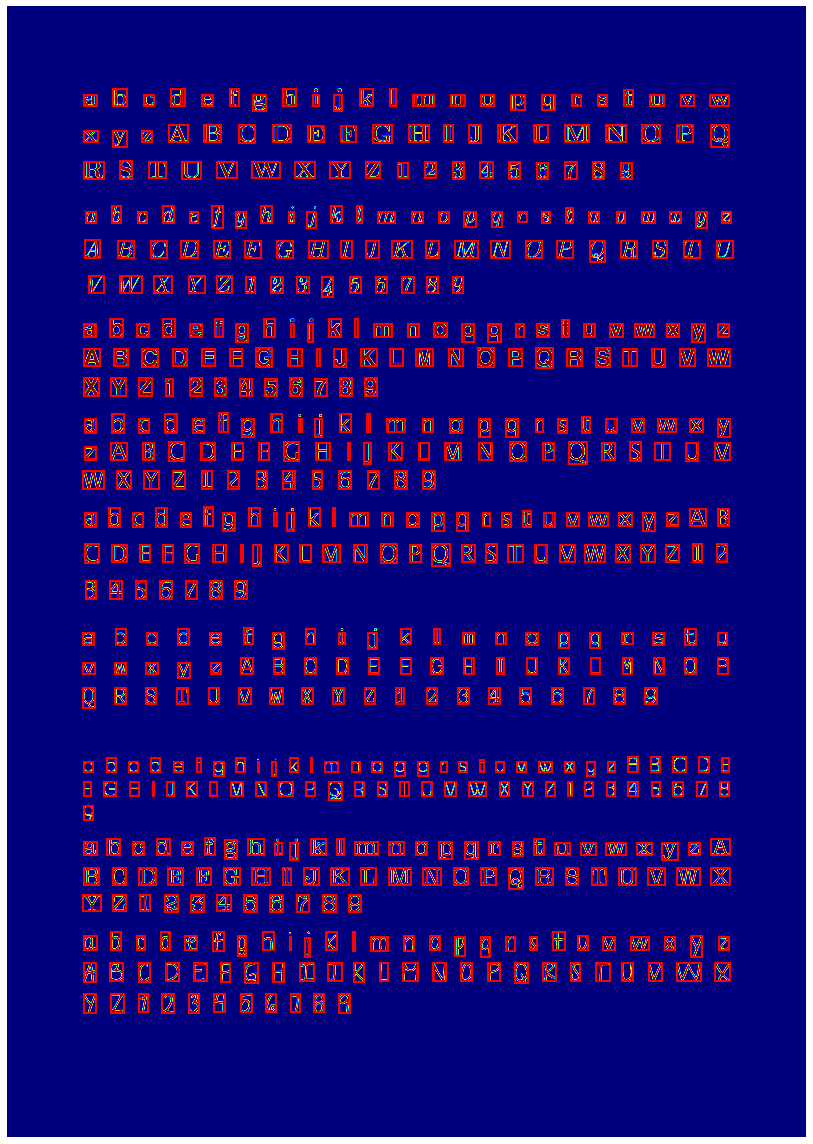

Characters recognized: 549
training character: a (600/549)
training character: b (601/549)
training character: c (602/549)
training character: d (603/549)
training character: e (604/549)
training character: f (605/549)
training character: g (606/549)
training character: h (607/549)
training character: i (608/549)
training character: j (609/549)
training character: k (610/549)
training character: l (611/549)
training character: m (612/549)
training character: n (613/549)
training character: o (614/549)
training character: p (615/549)
training character: q (616/549)
training character: r (617/549)
training character: s (618/549)
training character: t (619/549)
training character: u (620/549)
training character: v (621/549)
training character: w (622/549)
training character: x (623/549)
training character: y (624/549)
training character: z (625/549)
training character: a (626/549)
training character: b (627/549)
training character: c (628/549)
training character: d (629/549)
training char

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


training character: o (945/549)
training character: p (946/549)
training character: q (947/549)
training character: r (948/549)
training character: s (949/549)
training character: t (950/549)
training character: u (951/549)
training character: v (952/549)
training character: w (953/549)
training character: x (954/549)
training character: y (955/549)
training character: z (956/549)
training character: 1 (957/549)
training character: 2 (958/549)
training character: 3 (959/549)
training character: 4 (960/549)
training character: 5 (961/549)
training character: 6 (962/549)
training character: 7 (963/549)
training character: 8 (964/549)
training character: 9 (965/549)
training character: a (966/549)
training character: b (967/549)
training character: c (968/549)
training character: d (969/549)
training character: e (970/549)
training character: f (971/549)
training character: g (972/549)
training character: h (973/549)
training character: i (974/549)
training character: j (975/549)
training

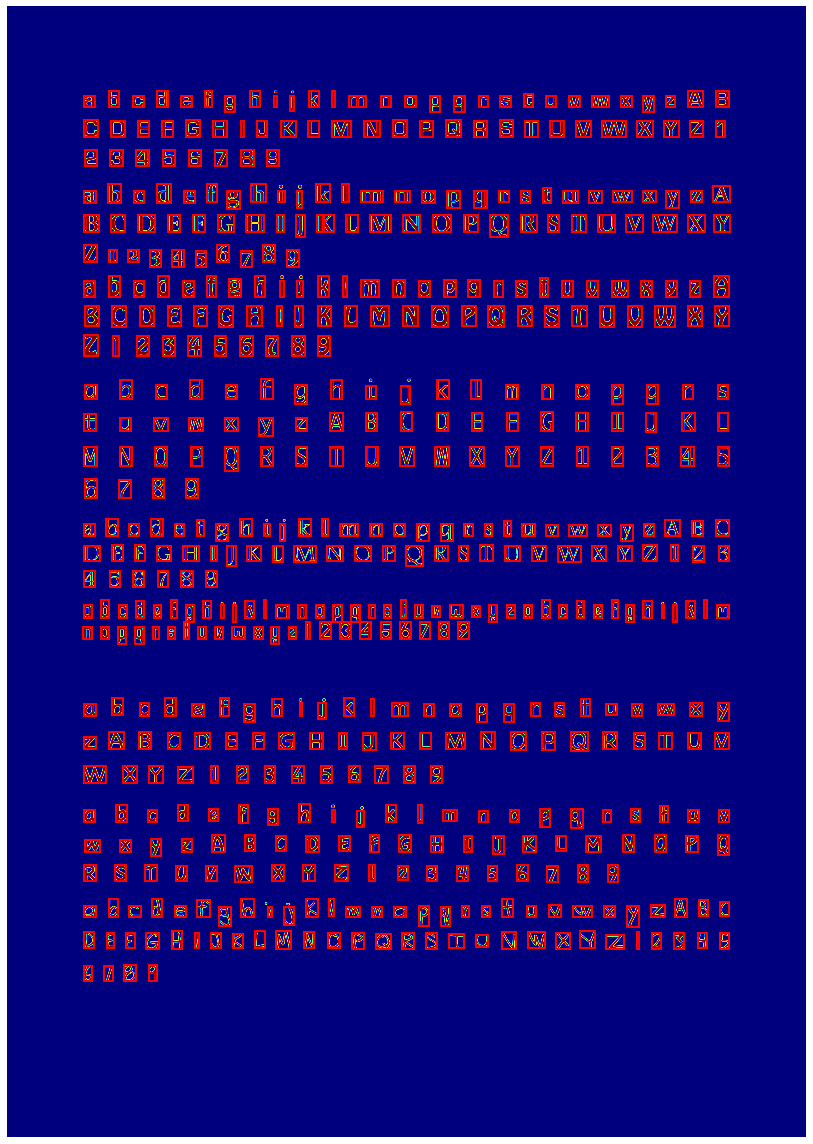

Characters recognized: 549
training character: a (1149/549)
training character: b (1150/549)
training character: c (1151/549)
training character: d (1152/549)
training character: e (1153/549)
training character: f (1154/549)
training character: g (1155/549)
training character: h (1156/549)
training character: i (1157/549)
training character: j (1158/549)
training character: k (1159/549)
training character: l (1160/549)
training character: m (1161/549)
training character: n (1162/549)
training character: o (1163/549)
training character: p (1164/549)
training character: q (1165/549)
training character: r (1166/549)
training character: s (1167/549)
training character: t (1168/549)
training character: u (1169/549)
training character: v (1170/549)
training character: w (1171/549)
training character: x (1172/549)
training character: y (1173/549)
training character: z (1174/549)
training character: a (1175/549)
training character: b (1176/549)
training character: c (1177/549)
training charact

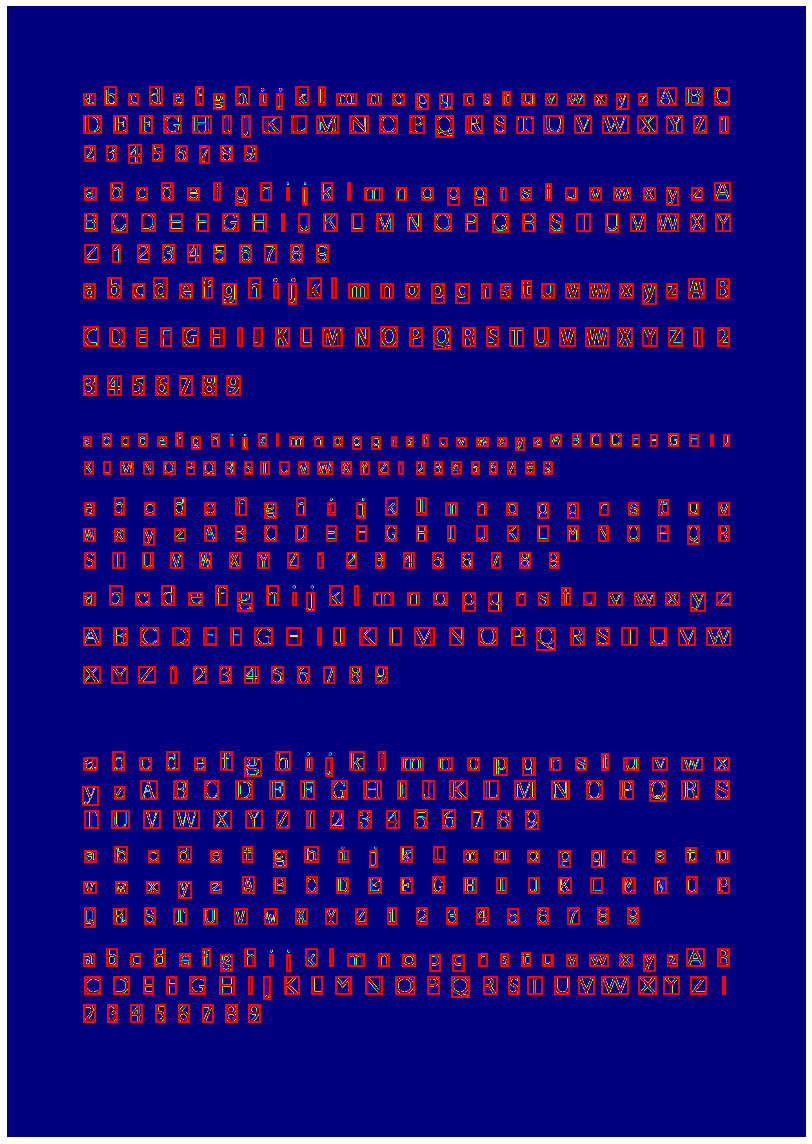

Characters recognized: 549
training character: a (1698/549)
training character: b (1699/549)
training character: c (1700/549)
training character: d (1701/549)
training character: e (1702/549)
training character: f (1703/549)
training character: g (1704/549)
training character: h (1705/549)
training character: i (1706/549)
training character: j (1707/549)
training character: k (1708/549)
training character: l (1709/549)
training character: m (1710/549)
training character: n (1711/549)
training character: o (1712/549)
training character: p (1713/549)
training character: q (1714/549)
training character: r (1715/549)
training character: s (1716/549)
training character: t (1717/549)
training character: u (1718/549)
training character: v (1719/549)
training character: w (1720/549)
training character: x (1721/549)
training character: y (1722/549)
training character: z (1723/549)
training character: a (1724/549)
training character: b (1725/549)
training character: c (1726/549)
training charact

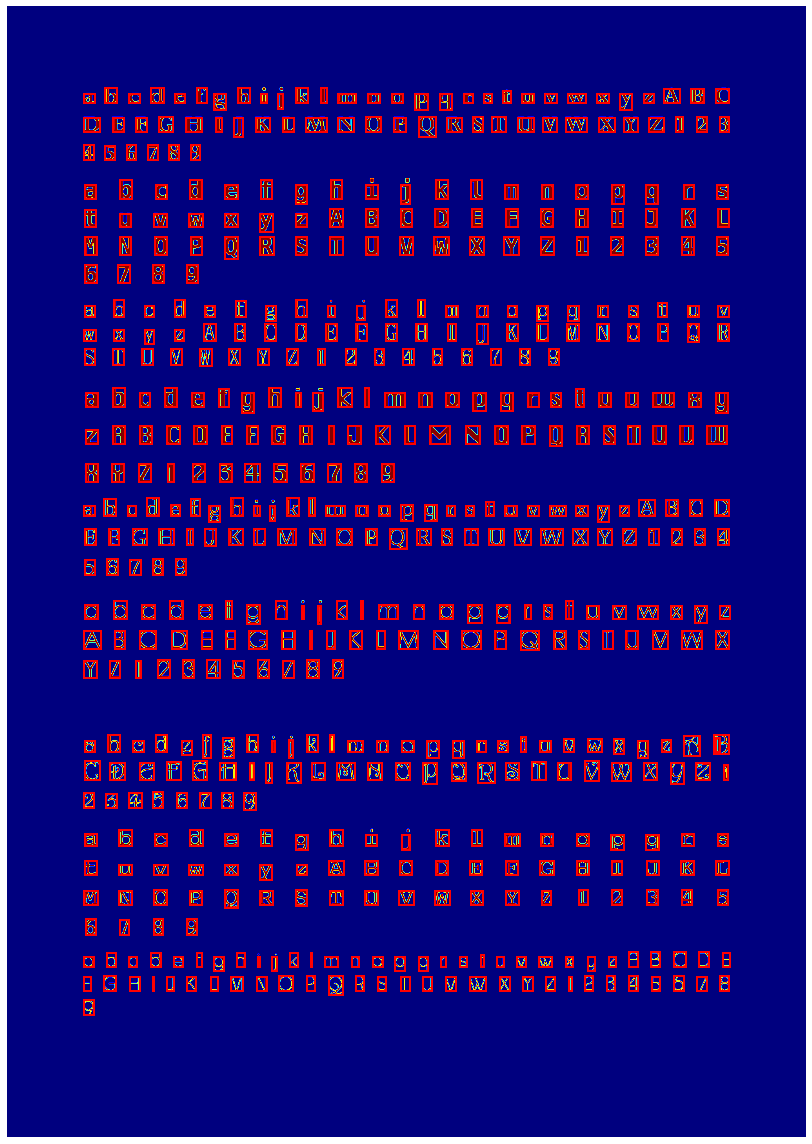

Characters recognized: 549
training character: a (2247/549)
training character: b (2248/549)
training character: c (2249/549)
training character: d (2250/549)
training character: e (2251/549)
training character: f (2252/549)
training character: g (2253/549)
training character: h (2254/549)
training character: i (2255/549)
training character: j (2256/549)
training character: k (2257/549)
training character: l (2258/549)
training character: m (2259/549)
training character: n (2260/549)
training character: o (2261/549)
training character: p (2262/549)
training character: q (2263/549)
training character: r (2264/549)
training character: s (2265/549)
training character: t (2266/549)
training character: u (2267/549)
training character: v (2268/549)
training character: w (2269/549)
training character: x (2270/549)
training character: y (2271/549)
training character: z (2272/549)
training character: a (2273/549)
training character: b (2274/549)
training character: c (2275/549)
training charact

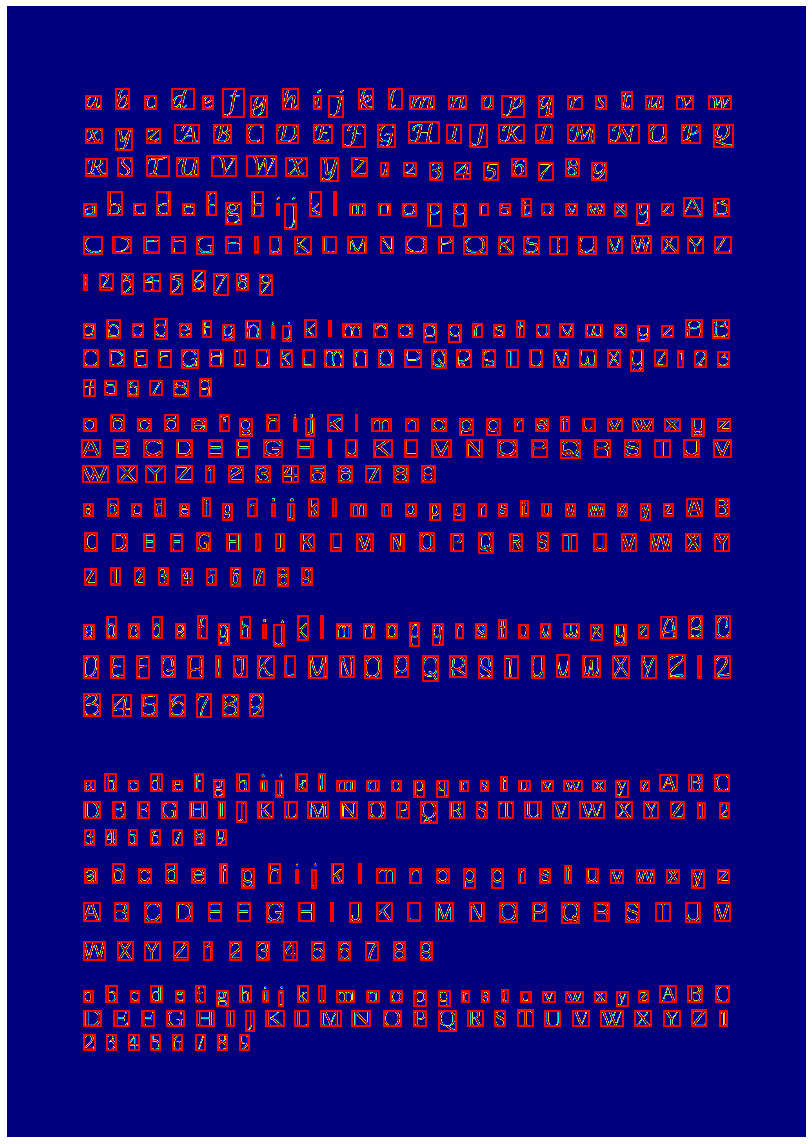

Characters recognized: 549
training character: a (2796/549)
training character: b (2797/549)
training character: c (2798/549)
training character: d (2799/549)
training character: e (2800/549)
training character: f (2801/549)
training character: g (2802/549)
training character: h (2803/549)
training character: i (2804/549)
training character: j (2805/549)
training character: k (2806/549)
training character: l (2807/549)
training character: m (2808/549)
training character: n (2809/549)
training character: o (2810/549)
training character: p (2811/549)
training character: q (2812/549)
training character: r (2813/549)
training character: s (2814/549)
training character: t (2815/549)
training character: u (2816/549)
training character: v (2817/549)
training character: w (2818/549)
training character: x (2819/549)
training character: y (2820/549)
training character: z (2821/549)
training character: a (2822/549)
training character: b (2823/549)
training character: c (2824/549)
training charact

In [5]:
def __init__(self):
        print("Extracting characters...")


start_time = time.time()
extract = Extract_Letters()
training_files = ['./WritingRecognition/ocr/training/training1.png', './WritingRecognition/ocr/training/training2.png','./WritingRecognition/ocr/training/training3.png','./WritingRecognition/ocr/training/training4.png','./WritingRecognition/ocr/training/training6.png']

folder_string = 'abcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyz123456789'
letter_string = 'abcdefghijklmnopqrstuvwxyz123456789'
name_counter = 600
for files in training_files:
    letters = extract.extractFile(files)
    string_counter = 0

    for i in letters:
        if string_counter > 60:
            string_counter = 0
        imsave('./WritingRecognition/training_type/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)
        print ('training character: ' + str(folder_string[string_counter]) + ' (' + str(name_counter) + '/' + str(len(letters)) + ')')
        # string counter is the actual letter
        # str len character is the character length nthe entire doucment
        # name counter is the amount of letters recognized from 600
        string_counter += 1
        name_counter += 1

print (time.time() - start_time, "seconds" )

In [6]:
  #to the newly created training type folder
trainingType_files = './training_type'
#create empty data holders for the training data
data = []
train_label = []

#training
for i in letter_string:
    cur_letter = i 
    cur_folder = trainingType_files + cur_letter + '/'
    for j in glob.glob(cur_folder + '*.png'):
      cur_folder = j
      image = imread(cur_folder, 1)
      image = imresize(image, (200,200))
      #hog applied here so that they have the same dimensions
      hog_features = hog(image, orientations=12, pixels_per_cell=(16, 16), cells_per_block=(1, 1)) 
      data.append(hog_features)
      train_label.append(cur_letter)
    print ('labelled ' + cur_letter)

#create the SVC
clf = LinearSVC(dual = False, verbose = 1)
#train the svm
clf.fit(data, train_label)
print("Training finished successfully")

labelled a
labelled b
labelled c
labelled d
labelled e
labelled f
labelled g
labelled h
labelled i
labelled j
labelled k
labelled l
labelled m
labelled n
labelled o
labelled p
labelled q
labelled r
labelled s
labelled t
labelled u
labelled v
labelled w
labelled x
labelled y
labelled z
labelled 1
labelled 2
labelled 3
labelled 4
labelled 5
labelled 6
labelled 7
labelled 8
labelled 9


ValueError: ignored

In [0]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = ['./WritingRecognition/ocr/training/training1.png', './WritingRecognition/ocr/training/training2.png','./WritingRecognition/ocr/training/training3.png','./WritingRecognition/ocr/training/training4.png','./WritingRecognition/ocr/training/training6.png']

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
for i in letter_string:
    cur_letter = i 
    cur_folder = trainingType_files + cur_letter + '/'
    for j in glob.glob(cur_folder + '*.png'):
      cur_folder = j
      image = imread(cur_folder, 1)
      image = imresize(image, (200,200))
      #hog applied here so that they have the same dimensions
      hog_features = hog(image, orientations=12, pixels_per_cell=(16, 16), cells_per_block=(1, 1)) 
      data.append(hog_features)
      train_label.append(cur_letter)
    print ('labelled ' + cur_letter)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()